In [8]:
import pycosat
import random
from dimacs import *
import matplotlib.pyplot as plt

## Przejście fazowe SAT

W ramach tego zadania należy sporządzić wykres, który pokazuje prawdopodobieństwo, że losowo wygenerowana formuła w formacie k-CNF (k literałów na klauzulę) jest spełnialna, w zależności od ilorazu liczby klauzul i liczby zmiennych.

Generowanie losowej klauzuli. Załóżmy, że mamy n zmiennych do dyspozycji (o numerach 1, …, n). Losowa klauzula rozmiaru k składa się z losowo wybranych k zmiennych (z powtarzaniem), z których każda jest zanegowana/niezanegowana z prawdopodobieństwem 1/2.

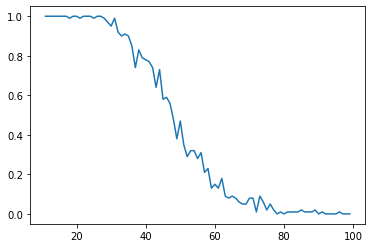

In [5]:
def sat_phase_transition(n: int, k: int, T: int):
    inverse_step = 10
    x = []
    y = []
    for i in range(1, 9 * inverse_step):
        a = int((1 + i / inverse_step) * n)

        satisfiable = 0
        for j in range(T):
            formula = [[random.choice(range(1, n + 1)) * random.choice([1, -1]) # n zmiennych zanegowana / nie
                        for _ in range(k)]
                        for _ in range(a)]
            if pycosat.solve(formula) != u'UNSAT':
                satisfiable += 1

        res = satisfiable / T

        x.append(a)
        y.append(res)

    plt.plot(x, y)
    plt.show()
    
sat_phase_transition(10, 3, 100)

## Exact Cover by 3-Sets (X3C)

W tym zadaniu należy zaimplementować redukcję pewnego wariantu problemu X3C do SAT oraz wykorzystać solwer SAT do rozwiązywania przykładowych instancji X3C.

W problemie X3C mamy dany zbiór elementów N = {1, …, 3k} oraz rodzinę zbiorów *S = {S1, …, Sm}* gdzie m <= 3k. Każdy zbiór Si zawiera trzy elementy ze zbioru N a każdy element z N występuje najwyżej w trzech zbiorach z rodziny S. Pytanie brzmi czy da się wybrać k zbiorów tak, że każdy element zbioru N należy do dokładnie jednego wybranego zbioru.

### Redukcja do SAT
Pomysł redukcji polega na tym, że dla każdego zbioru *Si* tworzymy zmiennę logiczną xi, której wartość interpretujemy następująco:

 - jeśli xi = 1 to zbiór *Si należy do rozwiązania,
 - jeśli xi = 0 to zbiór *Si nie należy do rozwiązania.
 
Następnie tworzymy następujące klauzule. Dla każdego elementu j ze zbioru N tworzymy klauzulę, która składa się ze zmiennych odpowiadających zbiorom, do których należy j. Na przykład, jeśli element 1 należy do zbiorów S6, S9 oraz S11 to tworzymy klauzulę:

( (x6 ∨ x9 ∨ x11) )

która wymusza, że co najmniej jeden z tych zbiorów jest wybrany. Następnie dla każdej takiej klauzuli należy zapewnić, że żadne dwa zbiory zawierające ten sam element nie są wybrane jednocześnie. Dla powyższego przykładu wystarczy dodać trzy klauzule:

( (-x6 ∨ -x9) ∧ (-x6 ∨ -x11) ∧ (-x9 ∨ -x11) )

Każda z powyższych klauzul mówi, że spośród dwóch zbiorów co najwyżej jeden może być wybrany.

In [7]:
def solve_x3c():
    test_name = '10.no.x3c'
    tests_dir = 'x3c'
    test = f'{tests_dir}/{test_name}'

    n, x3c = loadX3C(test)

    cnf = [[] for i in range(n)]

    temp = []

    for var in range(1, n+1):
        for S in range(len(x3c)):
            if var in x3c[S]:
                cnf[var - 1].append(S + 1)

        for i in range(len(cnf[var - 1])):
            for j in range(len(cnf[var - 1])):
                if i < j:
                    temp.append([-cnf[var - 1][i], -cnf[var - 1][j]])

    cnf += temp

    return pycosat.solve(cnf) != "UNSAT"

solve_x3c()

False